<a href="https://colab.research.google.com/github/Hari70649kt/Block-chain-basics/blob/main/block_chain_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import hashlib
import time
import json

class Block:
    """
    A class representing a single block in a blockchain.
    Each block contains:
    - Index: Position of the block in the chain
    - Previous Hash: Hash of the previous block
    - Timestamp: Time of block creation
    - Data: Information stored in the block
    - Nonce: Value to achieve proof of work
    - Difficulty: Difficulty level of proof of work
    """
    def __init__(self, index, previous_hash, timestamp, data, nonce=0, difficulty=4):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.difficulty = difficulty
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        """
        Calculate the SHA-256 hash of the block by converting its properties into a JSON string.
        """
        block_string = json.dumps({
            "index": self.index,
            "previous_hash": self.previous_hash,
            "timestamp": self.timestamp,
            "data": self.data,
            "nonce": self.nonce,
            "difficulty": self.difficulty
        }, sort_keys=True)
        return hashlib.sha256(block_string.encode()).hexdigest()

def create_genesis_block():
    """
    Create the first block (Genesis Block) with fixed values.
    """
    return Block(0, "0", time.time(), "Genesis Block")

def create_new_block(previous_block, data, difficulty):
    """
    Create a new block using the previous block's hash.
    """
    new_index = previous_block.index + 1
    new_timestamp = time.time()
    new_block = Block(new_index, previous_block.hash, new_timestamp, data, difficulty=difficulty)
    return proof_of_work(new_block)

def proof_of_work(block):
    """
    Implement proof-of-work by adjusting the nonce until the hash meets the difficulty target.
    """
    while block.hash[:block.difficulty] != "0" * block.difficulty:
        block.nonce += 1
        block.hash = block.calculate_hash()
    return block

def is_chain_valid(blockchain):
    """
    Validate the entire blockchain by ensuring:
    - Hash integrity
    - Consistency of previous hash references
    """
    for i in range(1, len(blockchain)):
        current_block = blockchain[i]
        previous_block = blockchain[i - 1]
        if current_block.hash != current_block.calculate_hash():
            return False
        if current_block.previous_hash != previous_block.hash:
            return False
    return True

def print_blockchain(blockchain):
    """
    Print all blocks in the blockchain in a readable JSON format.
    """
    for block in blockchain:
        print(json.dumps({
            "Index": block.index,
            "Timestamp": block.timestamp,
            "Data": block.data,
            "Previous Hash": block.previous_hash,
            "Hash": block.hash,
            "Nonce": block.nonce,
            "Difficulty": block.difficulty
        }, indent=4))
        print("-" * 40)

# Step 1: Create the blockchain
blockchain = [create_genesis_block()]
difficulty = 5

# Step 2: Add new blocks dynamically
for i in range(5):
    print(f"Mining Block {i+1}...")
    new_block = create_new_block(blockchain[-1], f"Block {i+1} Data", difficulty)
    blockchain.append(new_block)
    print(f"Block {i+1} Mined: {new_block.hash}\n")

# Step 3: Validate blockchain integrity
print("Blockchain Valid:", is_chain_valid(blockchain))

# Step 4: Display the blockchain
print("\nFinal Blockchain:")
print_blockchain(blockchain)


Mining Block 1...
Block 1 Mined: 00000d0978e80a0be65bd5e7d8ae6777bddec550ce84a787a343c78beb2626b4

Mining Block 2...
Block 2 Mined: 00000f8e3e80c3290aad9e56f1a89579306942d4ec599752d182dee10a8d96d2

Mining Block 3...
Block 3 Mined: 00000c3e4b45a63923fa1eb70c4e7c55557d6cf78d6c3bba521c967e61b76845

Mining Block 4...
Block 4 Mined: 00000bab51abcc7efa7beb821dcd348e4e71380dac1a95a2962e9151f227948d

Mining Block 5...
Block 5 Mined: 00000dd1ed5761c4b93e36c22e007ca1cd289f63d9a33297480f88557a8e8e19

Blockchain Valid: True

Final Blockchain:
{
    "Index": 0,
    "Timestamp": 1743654892.3597949,
    "Data": "Genesis Block",
    "Previous Hash": "0",
    "Hash": "cadcdea2be61bcb470617d6c327a7373a0414d816526d80a15cf2cc43f20707a",
    "Nonce": 0,
    "Difficulty": 4
}
----------------------------------------
{
    "Index": 1,
    "Timestamp": 1743654892.360484,
    "Data": "Block 1 Data",
    "Previous Hash": "cadcdea2be61bcb470617d6c327a7373a0414d816526d80a15cf2cc43f20707a",
    "Hash": "00000d0978

Mining new blocks...
Adding transactions...
Current blockchain:
[
    {
        "index": 1,
        "timestamp": 1743654973.4570558,
        "transactions": [],
        "proof": 1,
        "previous_hash": "0"
    },
    {
        "index": 2,
        "timestamp": 1743654973.5612497,
        "transactions": [
            {
                "sender": "0",
                "recipient": "miner_address",
                "amount": 1
            }
        ],
        "proof": 72608,
        "previous_hash": "96a3c995239928e34ab3575cc3ecb2c0c1ca73b38441a9c84dbbc01b0c83e97b"
    },
    {
        "index": 3,
        "timestamp": 1743654973.608767,
        "transactions": [
            {
                "sender": "0",
                "recipient": "miner_address",
                "amount": 1
            }
        ],
        "proof": 24348,
        "previous_hash": "eb47ab3af58b1e6ad8bb40b22aa1242f2ef2566ad3c08aa5add5ee472fe63357"
    },
    {
        "index": 4,
        "timestamp": 1743654973.878793

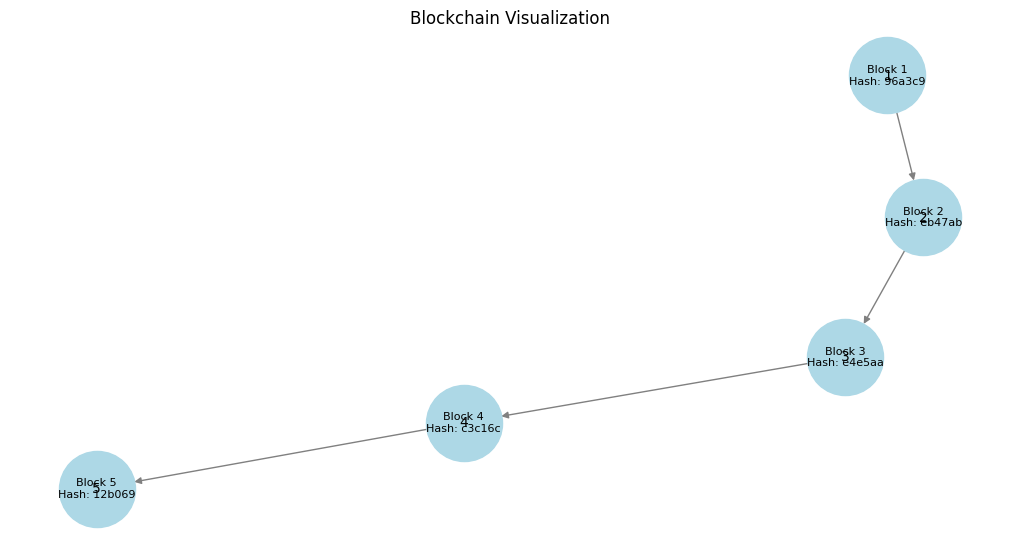

Visualizing Transactions:


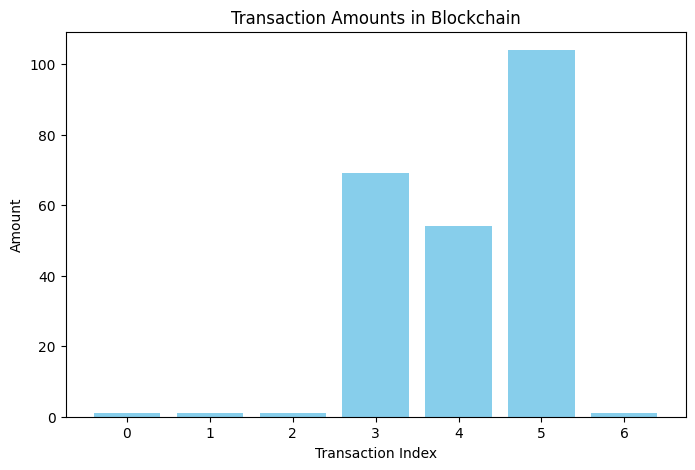

Visualizing Network Nodes:


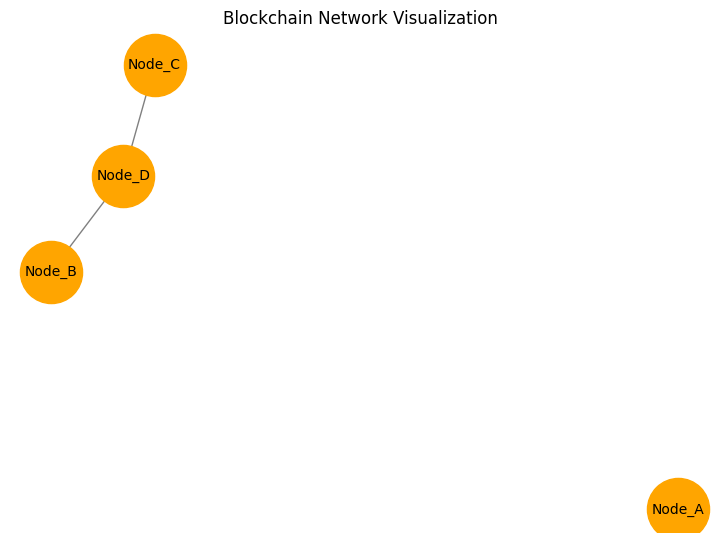

In [2]:
import hashlib
import json
import time
import matplotlib.pyplot as plt
import networkx as nx
import random
from collections import defaultdict

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.nodes = set()
        self.difficulty = 4  # Adjustable mining difficulty
        self.create_block(proof=1, previous_hash='0')  # Genesis block

    def create_block(self, proof, previous_hash):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time.time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash,
        }
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
        return self.last_block['index'] + 1

    def proof_of_work(self, last_proof):
        proof = 0
        while not self.valid_proof(last_proof, proof):
            proof += 1
        return proof

    def valid_proof(self, last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:self.difficulty] == '0' * self.difficulty

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    @property
    def last_block(self):
        return self.chain[-1]

    def register_node(self, address):
        self.nodes.add(address)

    def resolve_conflicts(self):
        return True  # Placeholder for consensus mechanism

def mine_block():
    last_block = blockchain.last_block
    proof = blockchain.proof_of_work(last_block['proof'])
    blockchain.add_transaction(sender='0', recipient='miner_address', amount=1)
    previous_hash = blockchain.hash(last_block)
    block = blockchain.create_block(proof, previous_hash)
    return block

def add_transaction(sender, recipient, amount):
    index = blockchain.add_transaction(sender, recipient, amount)
    return f'Transaction will be added to Block {index}'

def get_chain():
    return blockchain.chain

def plot_blockchain():
    G = nx.DiGraph()
    labels = {}

    for block in blockchain.chain:
        index = block['index']
        G.add_node(index)
        labels[index] = f"Block {index}\nHash: {blockchain.hash(block)[:6]}"
        if index > 1:
            G.add_edge(index - 1, index)

    plt.figure(figsize=(10, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    plt.title("Blockchain Visualization")
    plt.show()

def plot_transactions():
    senders = [tx['sender'] for block in blockchain.chain for tx in block['transactions']]
    recipients = [tx['recipient'] for block in blockchain.chain for tx in block['transactions']]
    amounts = [tx['amount'] for block in blockchain.chain for tx in block['transactions']]

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(amounts)), amounts, color='skyblue')
    plt.xlabel("Transaction Index")
    plt.ylabel("Amount")
    plt.title("Transaction Amounts in Blockchain")
    plt.show()

def plot_network():
    G = nx.Graph()
    nodes = list(blockchain.nodes)
    for node in nodes:
        G.add_node(node)
    for _ in range(len(nodes) * 2):
        G.add_edge(random.choice(nodes), random.choice(nodes))

    plt.figure(figsize=(7, 5))
    nx.draw(G, with_labels=True, node_color='orange', edge_color='gray', node_size=2000, font_size=10)
    plt.title("Blockchain Network Visualization")
    plt.show()

# Create a blockchain instance
blockchain = Blockchain()

# Register some nodes
blockchain.register_node("Node_A")
blockchain.register_node("Node_B")
blockchain.register_node("Node_C")
blockchain.register_node("Node_D")

print("Mining new blocks...")
mine_block()
mine_block()
mine_block()

print("Adding transactions...")
add_transaction("Alice", "Bob", random.randint(10, 100))
add_transaction("Charlie", "David", random.randint(20, 150))
add_transaction("Eve", "Frank", random.randint(30, 200))
mine_block()

print("Current blockchain:")
print(json.dumps(get_chain(), indent=4))

print("Visualizing Blockchain:")
plot_blockchain()

print("Visualizing Transactions:")
plot_transactions()

print("Visualizing Network Nodes:")
plot_network()
